In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [183]:
import io
from keras import regularizers
df= pd.read_csv(io.BytesIO(uploaded["creditcard.csv"]))

**Balancing the data**

In [184]:
non_fraud=df[df["Class"]==0]
fraud = df[df["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [185]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [186]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [187]:
x_data= data.drop(columns="Class", axis=0)
label = data["Class"]

**Splitting Training and Test data**

In [188]:
train_data, test_data, train_labels, test_labels=train_test_split(x_data, label, test_size=0.3, random_state=0, stratify = label)

In [189]:
train_data.shape, test_data.shape

((688, 30), (296, 30))

**Normalizing the data**

In [190]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std


In [191]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

**Building The Network**

In [262]:
model= models.Sequential()
model.add(layers.Dense(20, activation="relu", input_shape=(train_data.shape[1],)))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(8,activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(6,activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

**Training The Network**

In [263]:
history=model.fit(train_data, train_labels, epochs=100, validation_split=.2)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 0.6653 - accuracy: 0.4947 - val_loss: 0.6089 - val_accuracy: 0.5580
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.5437 - val_loss: 0.5473 - val_accuracy: 0.6957
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7476 - val_loss: 0.5080 - val_accuracy: 0.7826
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4528 - accuracy: 0.8482 - val_loss: 0.4826 - val_accuracy: 0.8696
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8922 - val_loss: 0.4651 - val_accuracy: 0.8986
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.9291 - val_loss: 0.4486 - val_accuracy: 0.9203
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3865 - accuracy: 0.9371 - val_loss: 0.4274 - val_accuracy: 0.9275
Epoch 8/100


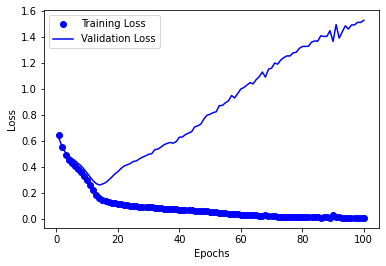

In [264]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

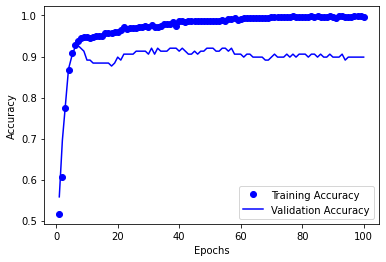

In [265]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[:], acc[:], "bo", label="Training Accuracy")
plt.plot(epochs[:], val_acc[:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Evaluating the Network**

In [266]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.9223


In [267]:
test_acc_score *100

92.22972989082336

**Predicting the values**

In [276]:
prediction=model.predict(test_data).astype(dtype="u8")

In [277]:
prediction[45:60]

array([[9.9702096e-01],
       [9.9482810e-01],
       [1.0153499e-01],
       [9.7816730e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.4390559e-04],
       [3.9679110e-03],
       [1.0014722e-01],
       [8.0814958e-04],
       [1.0000000e+00],
       [9.9999249e-01]], dtype=float32)

In [272]:
test_labels[45:60]

array([0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.])